# Funciones de distribución de probabilidades
## Distribución Uniforme

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a, b, n)

(array([ 99672., 100117.,  99983.,  99622., 100695., 100500.,  99510.,
         99976., 100418.,  99507.]),
 array([ 1.00014066, 10.90012417, 20.80010767, 30.70009118, 40.60007469,
        50.50005819, 60.4000417 , 70.30002521, 80.20000872, 90.09999222,
        99.99997573]),
 <a list of 10 Patch objects>)

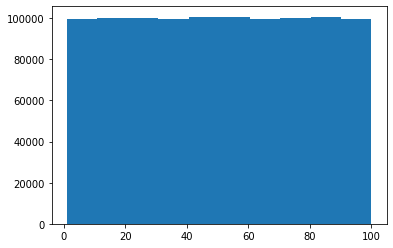

In [11]:
%matplotlib inline
plt.hist(data) #vemos que con este 'n' tan grande todos los numeros son casi equiprobables

## Distribución Normal (Gauss)

### Normal stardard: Media 0 y desviacion tipica(sigma)=1

In [12]:
data = np.random.randn(1000000)

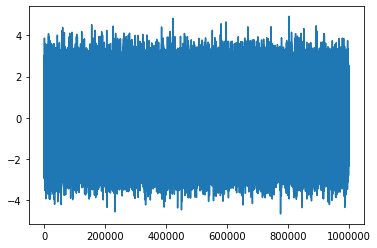

In [13]:
x = range(1,1000001)
plt.plot(x, data)

(array([1.04000e+02, 3.05100e+03, 3.42510e+04, 1.66583e+05, 3.48959e+05,
        3.09497e+05, 1.17177e+05, 1.90310e+04, 1.30400e+03, 4.30000e+01]),
 array([-4.65952938, -3.7013614 , -2.74319342, -1.78502543, -0.82685745,
         0.13131053,  1.08947851,  2.04764649,  3.00581448,  3.96398246,
         4.92215044]),
 <a list of 10 Patch objects>)

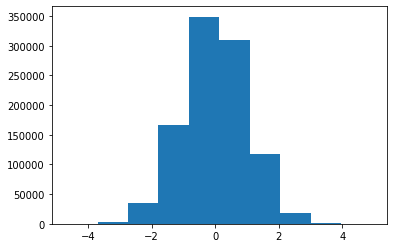

In [14]:
%matplotlib inline
plt.hist(data)

In [18]:
plt.plot(x,sorted(data)) #funcion de distribucion acumulada

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### Normal con Media en 5.5 y desviacion típica 2.5

(array([  20.,  139.,  712., 1838., 2843., 2599., 1361.,  408.,   68.,
          12.]),
 array([-3.52777645, -1.64913767,  0.2295011 ,  2.10813988,  3.98677866,
         5.86541744,  7.74405622,  9.622695  , 11.50133377, 13.37997255,
        15.25861133]),
 <a list of 10 Patch objects>)

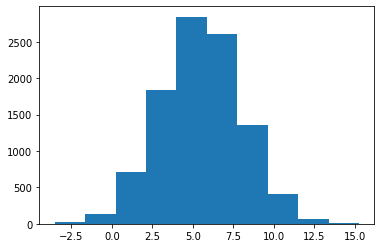

In [19]:
mu = 5.5
sd = 2.5
Z_10000 = np.random.randn(10000)
data = mu + sd * Z_10000 # Z = (X - mu) / sd -> N(0,1), X = mu + sd * Z
plt.hist(data)

In [20]:
data = np.random.randn(2,4) #para que devuelva 2 colecciones de 4 elementos de numeros random normal(gaussiano)
data

array([[ 1.25903729, -0.0530687 ,  0.57852381, -0.90264453],
       [-0.87562916, -1.11273783,  0.65390029, -0.6866037 ]])

## La simulación de Monte Carlo

* Generamos dos números aleatorios uniforme x e y entre 0 y 1 en total 1000 veces.
* Calcularemos $z = x^2 + y^2$:
    * Si $z < 1 \rightarrow$ estamos dentro del círculo.
    * Si $z \geq 1 \rightarrow$ estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π. 
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π.
    

In [41]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n # *4 ya que el metodo de MC es la probabilidad=dentro circulo/num totales de intentos=pi/4
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.141549999999997


(3.141549999999997, [<matplotlib.lines.Line2D at 0x116d47a20>])

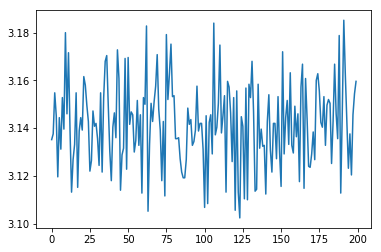

In [42]:
pi_montecarlo(10000, 200)

### Dummy Data Sets

In [47]:
n = 1000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 * np.random.randn(n),
        'C' : np.random.uniform(5, 32, n)
    }
)

In [49]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.000239,1.499385,18.469332
std,0.999032,2.498255,7.792416
min,-4.808515,-10.816448,5.000018
25%,-0.673233,-0.185435,11.709981
50%,0.001055,1.498496,18.461919
75%,0.675847,3.183562,25.217279
max,5.064791,13.143170,32.000000


(array([5.90000e+01, 2.24800e+03, 2.99250e+04, 1.62936e+05, 3.55487e+05,
        3.17335e+05, 1.14403e+05, 1.66540e+04, 9.30000e+02, 2.30000e+01]),
 array([-4.80851462, -3.82118406, -2.83385349, -1.84652292, -0.85919236,
         0.12813821,  1.11546877,  2.10279934,  3.09012991,  4.07746047,
         5.06479104]),
 <a list of 10 Patch objects>)

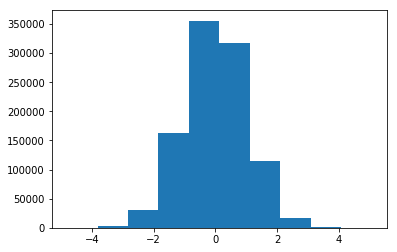

In [50]:
plt.hist(data["A"])

(array([2.70000e+01, 1.20700e+03, 1.87870e+04, 1.17181e+05, 3.09940e+05,
        3.48185e+05, 1.67357e+05, 3.42040e+04, 3.00800e+03, 1.04000e+02]),
 array([-10.81644789,  -8.4204861 ,  -6.02452431,  -3.62856252,
         -1.23260073,   1.16336106,   3.55932285,   5.95528464,
          8.35124643,  10.74720821,  13.14317   ]),
 <a list of 10 Patch objects>)

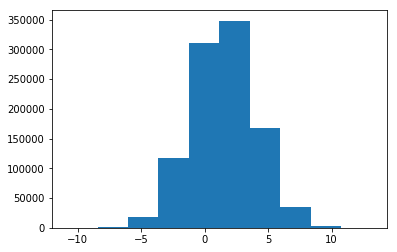

In [51]:
plt.hist(data["B"])

(array([100314., 100992., 100276.,  99833.,  99972., 100306.,  99547.,
         99831., 100141.,  98788.]),
 array([ 5.00001823,  7.7000164 , 10.40001457, 13.10001273, 15.8000109 ,
        18.50000907, 21.20000724, 23.9000054 , 26.60000357, 29.30000174,
        31.99999991]),
 <a list of 10 Patch objects>)

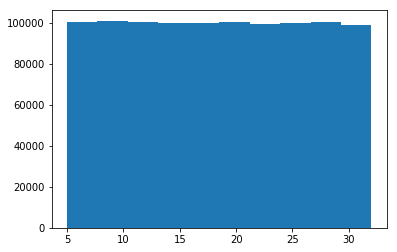

In [52]:
plt.hist(data["C"])

In [21]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [22]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [23]:
colum_names = data.columns.values.tolist()

In [24]:
a = len(colum_names)
a

21

In [25]:
new_data = pd.DataFrame(
    {
        'Column Name': colum_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
    }, index = range(42, 42 + a)
)

In [26]:
new_data

,Column Name,A,B
42,State,1.320749,0.411362
43,Account Length,0.298370,0.044812
44,Area Code,0.542145,0.828812
45,Phone,-1.950550,0.447144
46,Int'l Plan,-0.452246,0.705211
47,VMail Plan,1.340810,0.169390
48,VMail Message,1.275737,0.425597
49,Day Mins,0.664273,0.232874
50,Day Calls,0.474159,0.684121
51,Day Charge,-0.275961,0.146176
